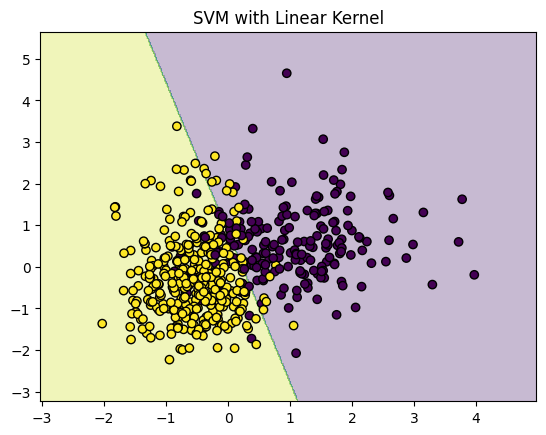

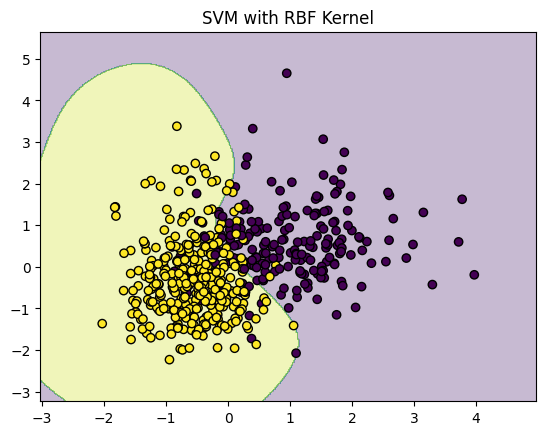

Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
Best Score: 0.9010989010989011
Cross-validation scores: [0.85964912 0.87719298 0.90350877 0.93859649 0.90265487]
Mean accuracy: 0.8963204471355379


In [2]:
#task7
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load dataset
data = load_breast_cancer()
X = data.data
y = data.target

# For visualization, reduce to 2 features
X = X[:, :2]  # Select first two features for 2D plotting

# Standardize
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Linear SVM
svm_linear = SVC(kernel='linear', C=1.0)
svm_linear.fit(X_train, y_train)

# RBF SVM
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_rbf.fit(X_train, y_train)
def plot_decision_boundary(clf, X, y, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.show()

plot_decision_boundary(svm_linear, X, y, "SVM with Linear Kernel")
plot_decision_boundary(svm_rbf, X, y, "SVM with RBF Kernel")
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 0.01, 0.1, 1],
    'kernel': ['rbf']
}

grid = GridSearchCV(SVC(), param_grid, cv=5)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)
from sklearn.model_selection import cross_val_score

best_model = grid.best_estimator_
scores = cross_val_score(best_model, X, y, cv=5)

print("Cross-validation scores:", scores)
print("Mean accuracy:", scores.mean())
